#### 冷启动问题
冷启动问题可分为3类：
- 用户冷启动：对新用户的推荐
- 物品冷启动：对新物品，推荐给用户
- 系统冷启动：新网站，需要提供个性化推荐服务  
常见的解决方案有：  
- 热门推荐
- 利用用户注册信息
- 利用用户在其他网站的行为记录或社交信息
- 在注册时，由用户选择个人的兴趣领域等
- 对新加入物品，采用内容信息，寻找类似的历史物品，从而进行推荐
- 系统冷启动，可以引入专家知识，建立起初步的物品相关度表

##### 利用用户注册信息
可以利用到的信息有人口统计学信息、用户兴趣描述以及从其他网站得到的用户信息。

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import os

In [2]:
def load_data(users_path,books_path,ratings_path):
    def read_users():
        """(user_id,location,age)"""
        u_cols = ['user_id','location','age']
        users = pd.read_csv(users_path,sep=';', names=u_cols, encoding='latin-1',low_memory=False)
        users = users.drop(users.index[0])
        users['age'] = users['age'].astype(float)
        users['user_id'] = users['user_id'].astype(int)
        return users
    def read_books():
        book_cols = ['isbn', 'book_title' ,'book_author','year_of_publication', 'publisher', 'img_s', 'img_m', 'img_l']
        """("ISBN";"Book-Title";"Book-Author";"Year-Of-Publication";"Publisher";"Image-URL-S";"Image-URL-M";"Image-URL-L")"""
        books = pd.read_csv(books_path, sep=';', names=book_cols, encoding='latin-1',low_memory=False)
        books = books.drop(books.index[0])
        books['year_of_publication'] = books['year_of_publication'].astype(int)
        return books
    def read_ratings():
        """ "User-ID";"ISBN";"Book-Rating"""
        rating_cols = ['user_id', 'isbn', 'rating']
        ratings = pd.read_csv(ratings_path, sep=';', names=rating_cols, encoding='latin-1',low_memory=False)
        ratings = ratings.drop(ratings.index[0])
        ratings['user_id'] = ratings['user_id'].astype(int)
        ratings['rating'] = ratings['rating'].astype(int)
        return ratings
    return read_users(),read_books(),read_ratings()

In [3]:
USERS_PATH = '../dataset/BXCrossing/BX-Users.csv'
BOOKS_PATH = '../dataset/BXCrossing/BX_Books.csv'
RATINGS_PATH = '../dataset/BXCrossing/BX-Book-Ratings.csv'
users,books,ratings = load_data(USERS_PATH,BOOKS_PATH,RATINGS_PATH)

In [4]:
users.head()

,user_id,location,age
1,1,"nyc, new york, usa",NaN
2,2,"stockton, california, usa",18.0
3,3,"moscow, yukon territory, russia",NaN
4,4,"porto, v.n.gaia, portugal",17.0
5,5,"farnborough, hants, united kingdom",NaN


In [5]:
users.isnull().sum()

user_id          0
location         0
age         110762
dtype: int64

In [6]:
# 缺失值处理
users.loc[(users.age > 99) | (users.age < 5),'age'] = np.nan
users['age'] = users['age'].fillna(users['age'].mean())

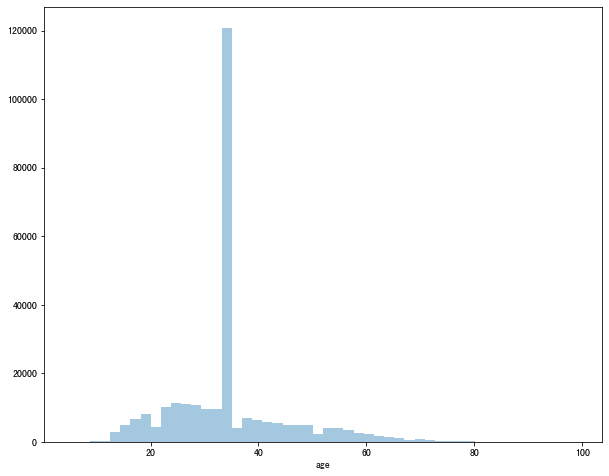

In [7]:
plot = plt.figure(figsize=(10,8))
sns.distplot(users['age'],kde=False)

In [8]:
books.loc[books.book_author.isnull(),'book_author'] = 'Larissa Anne Downe'

In [9]:
books.loc[books.publisher.isnull()]

,isbn,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l
128897,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129044,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


In [10]:
books.loc[books.isbn == '193169656X', 'publisher'] = 'Mundania Press LLC'
books.loc[books.isbn == '1931696993', 'publisher'] = 'Novelbooks Incorporated'

In [11]:
books.loc[books.img_l.isnull(),'img_l'] = books.img_m
books.isnull().sum()

isbn                   0
book_title             0
book_author            0
year_of_publication    0
publisher              0
img_s                  0
img_m                  0
img_l                  0
dtype: int64

In [12]:
books['year_of_publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984,    0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, 2012, 2006, 1909, 2008, 1378,
       1919, 1922, 1897, 2024, 1376, 2037])

In [13]:
books.loc[(books.year_of_publication == 0)|(books.year_of_publication > 2008),'year_of_publication'] = np.nan
books.year_of_publication = books.year_of_publication.fillna(round(books.year_of_publication.mean()))

In [14]:
books['year_of_publication'].unique()

array([2002., 2001., 1991., 1999., 2000., 1993., 1996., 1988., 2004.,
       1998., 1994., 2003., 1997., 1983., 1979., 1995., 1982., 1985.,
       1992., 1986., 1978., 1980., 1952., 1987., 1990., 1981., 1989.,
       1984., 1968., 1961., 1958., 1974., 1976., 1971., 1977., 1975.,
       1965., 1941., 1970., 1962., 1973., 1972., 1960., 1966., 1920.,
       1956., 1959., 1953., 1951., 1942., 1963., 1964., 1969., 1954.,
       1950., 1967., 2005., 1957., 1940., 1937., 1955., 1946., 1936.,
       1930., 1925., 1948., 1943., 1947., 1945., 1923., 1939., 1926.,
       1938., 1911., 1904., 1949., 1932., 1928., 1929., 1927., 1931.,
       1914., 1934., 1910., 1933., 1902., 1924., 1921., 1900., 1944.,
       1917., 1901., 1908., 1906., 1935., 1806., 2006., 1909., 2008.,
       1378., 1919., 1922., 1897., 1376.])

In [15]:
df = pd.merge(users,ratings,on='user_id')
df = pd.merge(df,books,on='isbn')
df.head()

,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l
0,2,"stockton, california, usa",18.0000,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,8,"timmins, ontario, canada",34.7439,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,11400,"ottawa, ontario, canada",49.0000,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
3,11676,"n/a, n/a, n/a",34.7439,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
4,41385,"sudbury, ontario, canada",34.7439,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [16]:
df.shape

(1031175, 12)

针对不同年龄阶段读者，选择最热门的5本书，进行推荐。  
根据推荐结果，其中，针对50岁以上的推荐结果并不能反应真实的兴趣。
$$
p(f,i) = |N(i)\cap U(f)|
$$

In [25]:
df.loc[df.age < 25,'book_title'].value_counts()[:5].index.tolist()

['Wild Animus',
 'The Lovely Bones: A Novel',
 'The Catcher in the Rye',
 "Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))",
 'Harry Potter and the Chamber of Secrets (Book 2)']

In [26]:
df.loc[df.age > 50,'book_title'].value_counts()[:5].index.tolist()

['Wild Animus',
 'The Da Vinci Code',
 'The Lovely Bones: A Novel',
 'A Painted House',
 'Angels & Demons']

对热门物品，添加惩罚，提高覆盖率。
$$
p(f,i) = \frac{|N(i)\cap U(f)|}{|N(i)|+\alpha}
$$
à是一个比较大的数字，避免出现因为数据稀疏而导致的结果为1的情况。

In [52]:
Ni = df.book_title.value_counts()
Ni['Wild Animus']

2502

In [58]:
U50 = df.loc[df.age > 50,'book_title'].value_counts()
sorted([(key,v/(Ni[key]+100)) for key,v in U50.items()],key=lambda b:b[1],reverse=True)[:10]

[('Lost Light', 0.16666666666666666),
 ('The Wailing Wind', 0.1552511415525114),
 ('A Thief of Time (Joe Leaphorn/Jim Chee Novels)', 0.15135135135135136),
 ('Dead Aim', 0.1507537688442211),
 ('Chasing the Dime', 0.14953271028037382),
 ('The King of Torts', 0.14695340501792115),
 ('Deception Point', 0.1464088397790055),
 ('The Beach House', 0.1383177570093458),
 ('Dark Horse', 0.1368421052631579),
 ('Q Is for Quarry', 0.13662790697674418)]

In [57]:
U25 = df.loc[df.age < 25,'book_title'].value_counts()
sorted([(key,v/(Ni[key]+100)) for key,v in U25.items()],key=lambda b:b[1],reverse=True)[:10]

[('The Perks of Being a Wallflower', 0.24019607843137256),
 ('And Then There Were None : A Novel', 0.22674418604651161),
 ('1984', 0.2109375),
 ('Chicken Soup for the Teenage Soul (Chicken Soup for the Soul)',
  0.2088888888888889),
 ('The Great Gatsby', 0.20327868852459016),
 ('The Catcher in the Rye', 0.20218579234972678),
 ('Wild Animus', 0.19446579554189086),
 ('Lord of the Flies', 0.19220055710306408),
 ('Animal Farm', 0.1921921921921922),
 ('The Giver (21st Century Reference)', 0.1863799283154122)]